In [64]:
import matplotlib.pyplot as plt
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import src.python.yalefaces as yalefaces
from src.python.models import Lenet5

In [6]:
X, y = yalefaces.load("../datasets/yalefaces", flatten=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=11, stratify=y)

In [44]:
batch_size = [20, 40, 60, 80]
epochs = [20]
optimizer = ['sgd', 'rmsprop', 'adadelta', 'adam', 'adamx']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
# init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal',
#              'he_uniform']
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(
    batch_size=batch_size,
    epochs=epochs,
    optimizer=optimizer,
    optimizer__learning_rate=learn_rate
)
model = KerasClassifier(model=Lenet5, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [45]:
cv = RandomizedSearchCV(model, param_grid, n_jobs=-1, cv=StratifiedKFold(n_splits=5, shuffle=True), n_iter=20)
#cv = GridSearchCV(model, param_grid, n_jobs=-1, cv=4)
grid_result = cv.fit(X_train, y_train)

C:\Users\migue\Documents\face-recog\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\migue\Documents\face-recog\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\migue\Documents\face-recog\venv\lib\site-packages\scikeras\wrappers.py", line 1474, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\migue\Documents\face-recog\venv\lib\site-packages\scikeras\wrappers.py", line 742, in f

Epoch 1/20
4/4 [==============================] - 5s 1s/step - loss: 2.8354 - accuracy: 0.0608
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 2.4714 - accuracy: 0.2500
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 1.9422 - accuracy: 0.4459
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 1.5873 - accuracy: 0.5878
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 1.2413 - accuracy: 0.7162
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.8863 - accuracy: 0.8311
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 0.6728 - accuracy: 0.8919
Epoch 8/20
4/4 [==============================] - 5s 1s/step - loss: 0.5734 - accuracy: 0.9054
Epoch 9/20
4/4 [==============================] - 5s 1s/step - loss: 0.4121 - accuracy: 0.9392
Epoch 10/20
4/4 [==============================] - 5s 1s/step - loss: 0.3351 - accuracy: 0.9662
Epoch 11/20
4/4 [==============================] 

In [46]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.905287 using {'optimizer__learning_rate': 0.2, 'optimizer': 'adadelta', 'epochs': 20, 'batch_size': 40}
nan (nan) with: {'optimizer__learning_rate': 0.3, 'optimizer': 'adamx', 'epochs': 20, 'batch_size': 20}
0.067586 (0.001126) with: {'optimizer__learning_rate': 0.1, 'optimizer': 'sgd', 'epochs': 20, 'batch_size': 80}
0.067586 (0.001126) with: {'optimizer__learning_rate': 0.2, 'optimizer': 'sgd', 'epochs': 20, 'batch_size': 40}
0.067586 (0.001126) with: {'optimizer__learning_rate': 0.3, 'optimizer': 'rmsprop', 'epochs': 20, 'batch_size': 20}
0.067586 (0.001126) with: {'optimizer__learning_rate': 0.01, 'optimizer': 'adam', 'epochs': 20, 'batch_size': 60}
0.067586 (0.001126) with: {'optimizer__learning_rate': 0.3, 'optimizer': 'sgd', 'epochs': 20, 'batch_size': 80}
nan (nan) with: {'optimizer__learning_rate': 0.001, 'optimizer': 'adamx', 'epochs': 20, 'batch_size': 40}
0.222759 (0.151881) with: {'optimizer__learning_rate': 0.001, 'optimizer': 'sgd', 'epochs': 20, 'batch_size': 20

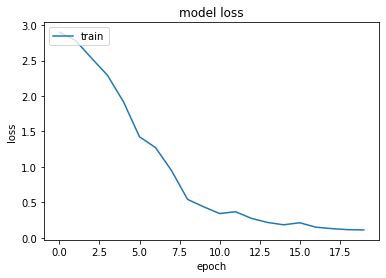

In [80]:
history = grid_result.best_estimator_.history_
plt.plot(history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

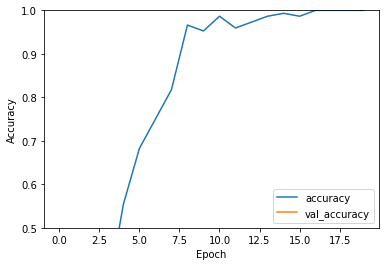

In [81]:
history = grid_result.best_estimator_.history_
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [83]:
test_loss, test_acc = cv.best_estimator_.model_.evaluate(X_test, y_test)

1/1 [==============================] - 0s 214ms/step - loss: 0.2942 - accuracy: 0.9412


In [ ]:
#model = KerasClassifier(model=Lenet5, loss="sparse_categorical_crossentropy", metrics=['accuracy'], **grid_result.best_params_)
#model.fit(X_train, y_train)

1/1 [==============================] - 0s 131ms/step - loss: 0.4262 - accuracy: 0.8824
Score (original): [0.4262296259403229, 0.8823529481887817]
1/1 [==============================] - 0s 126ms/step


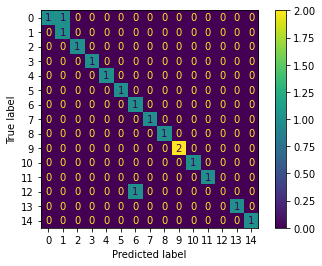

In [63]:

cls = cv.best_estimator_.model_
print("Score (original):", cls.evaluate(X_test, y_test))
y_pred = cls.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred.argmax(axis=1))